# Addiction and Brain Activity: an fMRI data Visualization Assignment
*Name_Surname* = Ozgur Gulen
*Date* = 24_11_2024
Neurosynth link:(https://neurosynth.org/analyses/terms/addiction/)

The code below is to automatically locate the brain imaging data in the folder. As the data files end with the ".nii" extension, I used it to locate them automatically with the glob.glob() function. 

In [1]:
# Firstly, I imported the libraries
import os
import glob

# Then, I got the current directory because the fMRI files are in the same file as this vscode document
directory = os.getcwd()

# Now, I am creating the path here for files ending with .nii
files = "*.nii"
file_located = os.path.join(directory, files)

# Finding the .nii files and printing them.
docs_in_file = glob.glob(file_located)
for file in docs_in_file:
    print(file)

# Below, you can see the files located with the .nii extension.


/Users/ozgurgulen/Desktop/assignment_og/anatomical.nii
/Users/ozgurgulen/Desktop/assignment_og/addiction_uniformity-test_z_FDR_0.01.nii


Now, I am visualizing the fMRI data using the nilearn library. Before visualizing it, I checked in which angle brain activity looks more clear, and assigned values to coordinates accordingly.

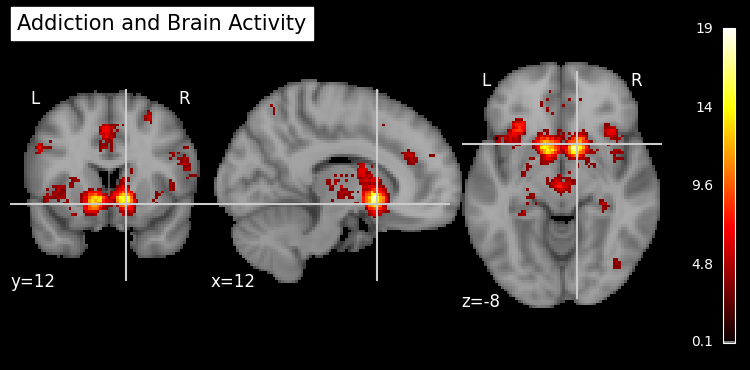

In [2]:
# Importing necessary libraries

from nilearn import plotting, image

# This code is to assign anatomical and functional images according to their order in the file (see above)
anatomy_img = docs_in_file[0]  # This is the anatomical image
functional_img = docs_in_file[1]  # This is the functional image

# Visualizing the functional data on top of the structural data
plotting.plot_stat_map(functional_img, bg_img=anatomy_img, title = "Addiction and Brain Activity", cmap = "hot", threshold = 0.1, cut_coords = (12, 12, -8), display_mode = "ortho")


After visualizing the data, now it's time to plot the data! I am using matplotlib, nibabel, and numpy to create a histogram. The histogram only includes positive values. 

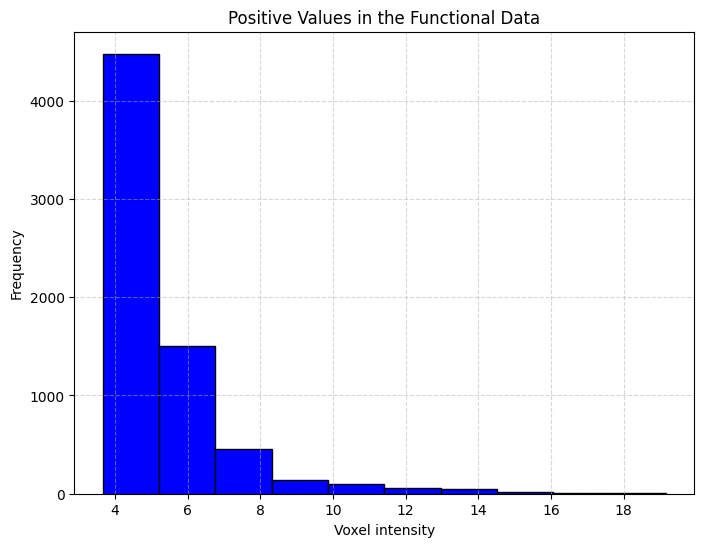

In [3]:
# Codes below is to create the histogram

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Getting the data using nibabel

data_fmri = nib.load(functional_img).get_fdata()

# Selecting positive values

poz_values = data_fmri[data_fmri > 0]

# Creating the histogram

plt.figure(figsize = (8, 6))
plt.hist(poz_values, color = "blue", edgecolor='black')
plt.title("Positive Values in the Functional Data")
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylabel("Frequency")
plt.xlabel("Voxel intensity")
plt.show() # Showing the histogram